<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/HOCalculus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving supernovas.csv to supernovas (8).csv
            CID     zCMB       MU         H0
0       1246275  0.24605  40.5938  56.115660
1       1246281  0.33549  41.2263  57.179491
2       1246314  0.38337  41.6383  54.047900
3       1246527  0.32078  41.1991  55.361518
4       1246529  0.49677  42.1471  55.405906
...         ...      ...      ...        ...
1824  SN2017cpu  0.05529  36.8308  71.335760
1825   SN2017hn  0.02492  35.2067  67.924858
1826   SN2017mf  0.02618  35.3916  65.534554
1827   SN2017ms  0.02538  35.3421  64.996852
1828   iPTF17dz  0.09284  38.3430  59.697457

[1829 rows x 4 columns]

Valor promedio de H0: 54.07 km/s/Mpc
Desviación estándar de H0: 7.74 km/s/Mpc


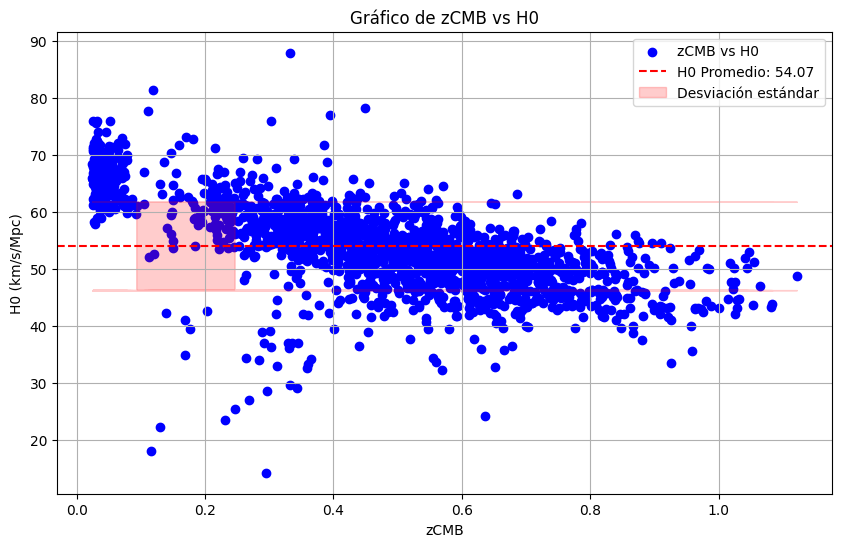

In [ ]:

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Subir archivo CSV
uploaded = files.upload()

# Leer el archivo CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Constante: velocidad de la luz en km/s
c = 299792.458

# Calcular d_L en Mpc y H_0 para cada fila
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)
df['H0'] = (c * df['zCMB']) / df['d_L']

# Calcular el valor promedio y la variabilidad (desviación estándar) de H0
H0_promedio = df['H0'].mean()
H0_std = df['H0'].std()

# Mostrar las primeras filas del DataFrame, el valor promedio y la desviación estándar de H0
print(df[['CID', 'zCMB', 'MU', 'H0']])
print(f"\nValor promedio de H0: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviación estándar de H0: {H0_std:.2f} km/s/Mpc")

# Crear un gráfico de zCMB vs H0
plt.figure(figsize=(10, 6))
plt.scatter(df['zCMB'], df['H0'], color='blue', label='zCMB vs H0')
plt.axhline(y=H0_promedio, color='r', linestyle='--', label=f'H0 Promedio: {H0_promedio:.2f}')
plt.fill_between(df['zCMB'], H0_promedio - H0_std, H0_promedio + H0_std, color='r', alpha=0.2, label='Desviación estándar')
plt.xlabel('zCMB')
plt.ylabel('H0 (km/s/Mpc)')
plt.title('Gráfico de zCMB vs H0')
plt.legend()
plt.grid(True)
plt.show()

Saving supernovas.csv to supernovas (4).csv

Mostrant les primeres files del DataFrame:
            CID     zCMB       MU  d_L_observat     d_L_LCDM  H0_observat  \
0       1246275  0.24605  40.5938   1314.498213  1237.584484    56.115660   
1       1246281  0.33549  41.2263   1758.976349  1767.497356    57.179491   
2       1246314  0.38337  41.6383   2126.473623  2066.145852    54.047900   
3       1246527  0.32078  41.1991   1737.080720  1677.776022    55.361518   
4       1246529  0.49677  42.1471   2687.942660  2811.000588    55.405906   
...         ...      ...      ...           ...          ...          ...   
1824  SN2017cpu  0.05529  36.8308    232.359268   246.742056    71.335760   
1825   SN2017hn  0.02492  35.2067    109.986656   108.769190    67.924858   
1826   SN2017mf  0.02618  35.3916    119.762265   114.376270    65.534554   
1827   SN2017ms  0.02538  35.3421    117.063094   110.815030    64.996852   
1828   iPTF17dz  0.09284  38.3430    466.229769   425.285157    5

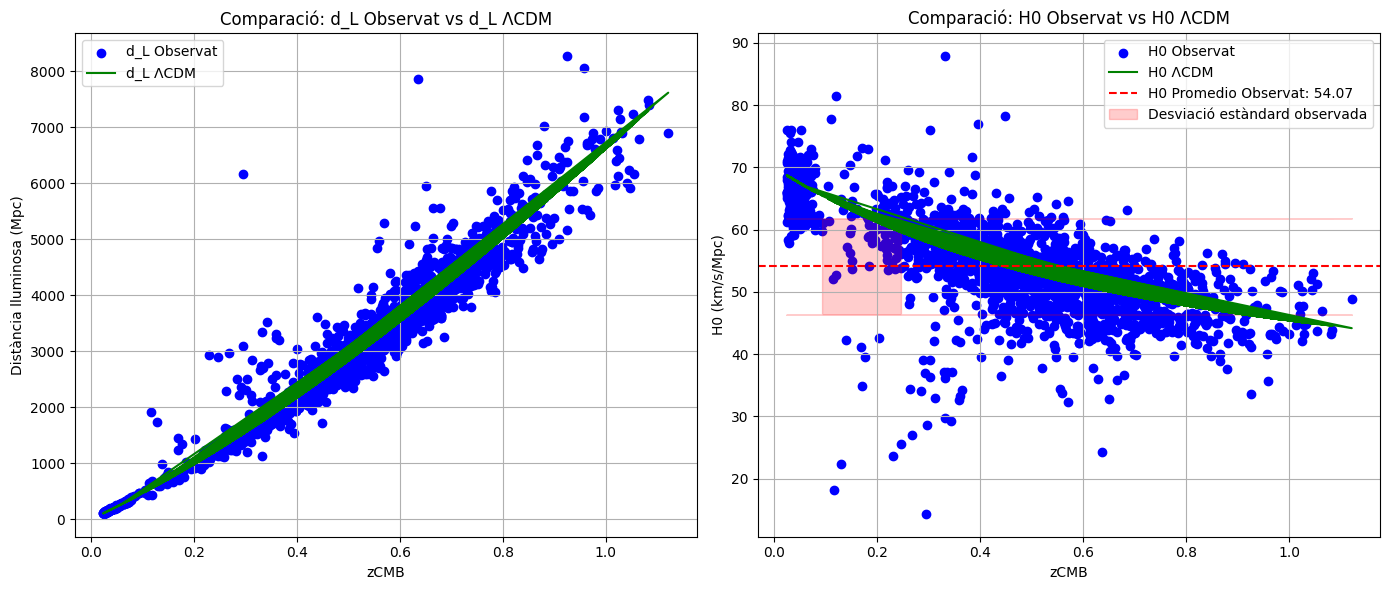

In [ ]:

# Importar llibreries necessàries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
from google.colab import files

# Subir archivo CSV
uploaded = files.upload()

# Leer el archivo CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Configurar la cosmologia basada en el model estàndard ΛCDM
H0_cosmo = 70  # Hubble constant inicial (km/s/Mpc)
Omega_m_cosmo = 0.3  # Densitat de matèria inicial
cosmo = FlatLambdaCDM(H0=H0_cosmo, Om0=Omega_m_cosmo)

# Calcular d_L (distància lluminosa) basada en zCMB i MU observat
df['d_L_observat'] = 10 ** ((df['MU'] / 5) - 5)  # d_L en Mpc

# Calcular d_L basat en el model ΛCDM
df['d_L_LCDM'] = cosmo.luminosity_distance(df['zCMB']).value  # d_L en Mpc

# Recalcular H0 utilitzant les dues distàncies lluminoses
c = 299792.458  # Velocitat de la llum en km/s
df['H0_observat'] = (c * df['zCMB']) / df['d_L_observat']  # H0 observat
df['H0_LCDM'] = (c * df['zCMB']) / df['d_L_LCDM']  # H0 del model ΛCDM

# Comparar distàncies lluminoses
df['delta_d_L'] = df['d_L_observat'] - df['d_L_LCDM']

# Calcular el valor mitjà i desviació estàndard de H0 observat i H0 del model ΛCDM
H0_observat_mean = df['H0_observat'].mean()
H0_observat_std = df['H0_observat'].std()
H0_LCDM_mean = df['H0_LCDM'].mean()
H0_LCDM_std = df['H0_LCDM'].std()

# Resultats
print("\nMostrant les primeres files del DataFrame:")
print(df[['CID', 'zCMB', 'MU', 'd_L_observat', 'd_L_LCDM', 'H0_observat', 'H0_LCDM', 'delta_d_L']])

print(f"\nValor promedio de H0 observat: {H0_observat_mean:.2f} ± {H0_observat_std:.2f} km/s/Mpc")
print(f"Valor promedio de H0 (model ΛCDM): {H0_LCDM_mean:.2f} ± {H0_LCDM_std:.2f} km/s/Mpc")

# Gràfic comparatiu: zCMB vs distàncies lluminoses i H0
plt.figure(figsize=(14, 6))

# Subgràfic 1: Comparació de d_L observat i del model ΛCDM
plt.subplot(1, 2, 1)
plt.scatter(df['zCMB'], df['d_L_observat'], color='blue', label='d_L Observat')
plt.plot(df['zCMB'], df['d_L_LCDM'], color='green', linestyle='-', label='d_L ΛCDM')
plt.xlabel('zCMB')
plt.ylabel('Distància lluminosa (Mpc)')
plt.title('Comparació: d_L Observat vs d_L ΛCDM')
plt.legend()
plt.grid(True)

# Subgràfic 2: Comparació de H0 observat i H0 del model ΛCDM
plt.subplot(1, 2, 2)
plt.scatter(df['zCMB'], df['H0_observat'], color='blue', label='H0 Observat')
plt.plot(df['zCMB'], df['H0_LCDM'], color='green', linestyle='-', label='H0 ΛCDM')
plt.axhline(y=H0_observat_mean, color='r', linestyle='--', label=f'H0 Promedio Observat: {H0_observat_mean:.2f}')
plt.fill_between(df['zCMB'], H0_observat_mean - H0_observat_std, H0_observat_mean + H0_observat_std, color='r', alpha=0.2, label='Desviació estàndard observada')
plt.xlabel('zCMB')
plt.ylabel('H0 (km/s/Mpc)')
plt.title('Comparació: H0 Observat vs H0 ΛCDM')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

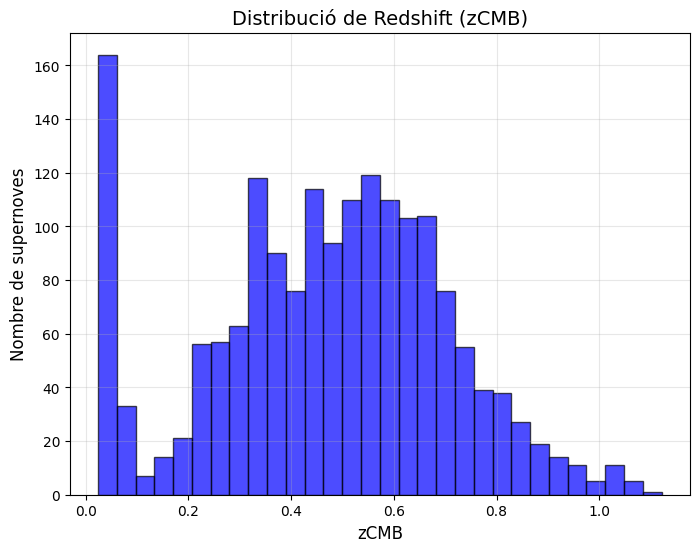

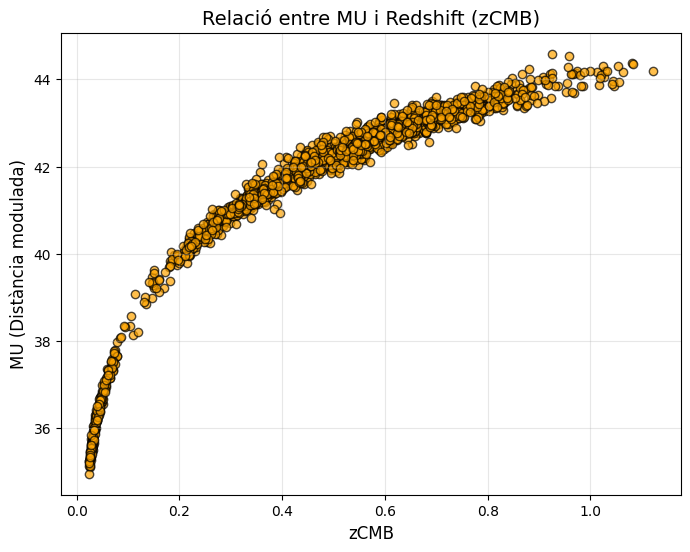

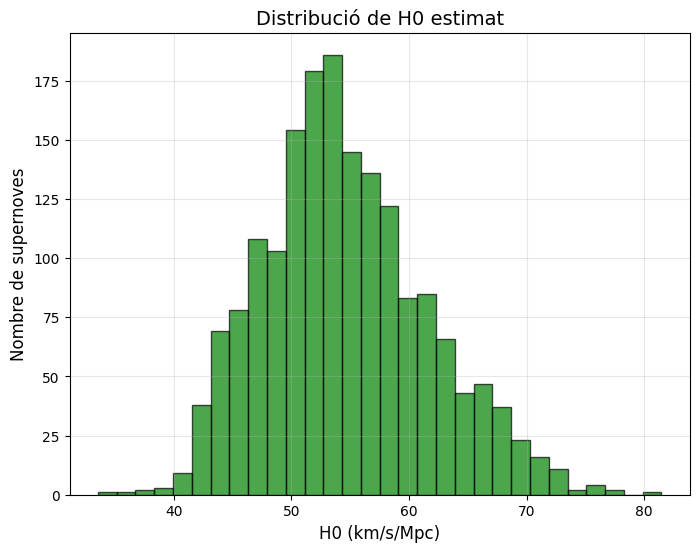

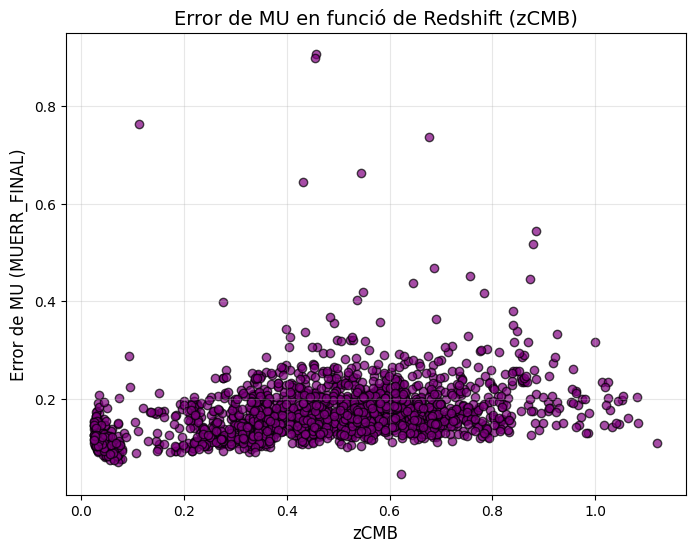

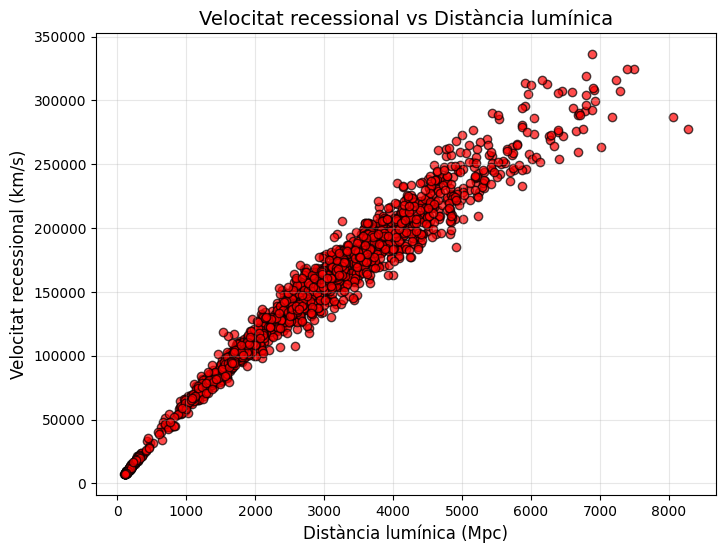

          H0_estimacio         MU  MUERR_FINAL      zCMB
IDSURVEY                                                
5            67.707017  36.254550     0.128787  0.041370
10           53.126266  42.200703     0.178622  0.522746
63           66.866991  35.908080     0.130360  0.034952
64           65.985369  36.180535     0.116529  0.040172
65           66.932984  36.064974     0.119147  0.037246
66           68.318613  36.273800     0.134067  0.041660
150          66.057693  36.449088     0.112634  0.045732
                  zCMB        MU  MUERR_FINAL  distancia  H0_estimacio
zCMB          1.000000  0.910634     0.350113   0.981345     -0.783120
MU            0.910634  1.000000     0.373364   0.875371     -0.816096
MUERR_FINAL   0.350113  0.373364     1.000000   0.370516     -0.394943
distancia     0.981345  0.875371     0.370516   1.000000     -0.845485
H0_estimacio -0.783120 -0.816096    -0.394943  -0.845485      1.000000


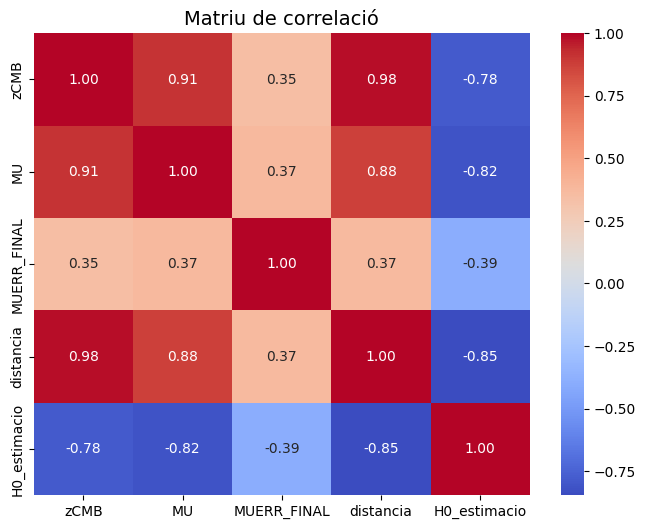

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar les dades de les supernoves (assumint que ja tens les dades carregades a data_filtrada)
# data_filtrada = pd.read_csv('supernoves.csv')  # Si les dades no estan carregades

# 1. Histograma de zCMB (Redshift)
plt.figure(figsize=(8, 6))
plt.hist(data_filtrada['zCMB'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribució de Redshift (zCMB)', fontsize=14)
plt.xlabel('zCMB', fontsize=12)
plt.ylabel('Nombre de supernoves', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 2. Relació entre MU i zCMB (Gràfic de dispersió)
plt.figure(figsize=(8, 6))
plt.scatter(data_filtrada['zCMB'], data_filtrada['MU'], alpha=0.7, c='orange', edgecolor='k')
plt.title('Relació entre MU i Redshift (zCMB)', fontsize=14)
plt.xlabel('zCMB', fontsize=12)
plt.ylabel('MU (Distància modulada)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 3. Histograma de H0 estimat
plt.figure(figsize=(8, 6))
plt.hist(data_filtrada['H0_estimacio'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title('Distribució de H0 estimat', fontsize=14)
plt.xlabel('H0 (km/s/Mpc)', fontsize=12)
plt.ylabel('Nombre de supernoves', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 4. Relació entre Error de MU (MUERR_FINAL) i zCMB (Gràfic de dispersió)
plt.figure(figsize=(8, 6))
plt.scatter(data_filtrada['zCMB'], data_filtrada['MUERR_FINAL'], alpha=0.7, c='purple', edgecolor='k')
plt.title('Error de MU en funció de Redshift (zCMB)', fontsize=14)
plt.xlabel('zCMB', fontsize=12)
plt.ylabel('Error de MU (MUERR_FINAL)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 5. Velocitat recessional vs Distància lumínica
plt.figure(figsize=(8, 6))
plt.scatter(data_filtrada['distancia'], data_filtrada['velocitat'], alpha=0.7, c='red', edgecolor='k')
plt.title('Velocitat recessional vs Distància lumínica', fontsize=14)
plt.xlabel('Distància lumínica (Mpc)', fontsize=12)
plt.ylabel('Velocitat recessional (km/s)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# 6. Resum estadístic per IDSURVEY
resum_idsurvey = data_filtrada.groupby('IDSURVEY')[['H0_estimacio', 'MU', 'MUERR_FINAL', 'zCMB']].mean()
print(resum_idsurvey)

# 7. Matriu de correlació entre les variables
correlacio = data_filtrada[['zCMB', 'MU', 'MUERR_FINAL', 'distancia', 'H0_estimacio']].corr()
print(correlacio)

# Gràfic de calor de la matriu de correlació
plt.figure(figsize=(8, 6))
sns.heatmap(correlacio, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriu de correlació', fontsize=14)
plt.show()

Saving supernovas.csv to supernovas (1).csv
Resum estadístic de les dades:
            CID     IDSURVEY         zCMB          zHD         zHEL  \
count      1829  1829.000000  1829.000000  1829.000000  1829.000000   
unique     1829          NaN          NaN          NaN          NaN   
top     1246275          NaN          NaN          NaN          NaN   
freq          1          NaN          NaN          NaN          NaN   
mean        NaN    21.023510     0.468935     0.468969     0.469774   
std         NaN    35.395221     0.232566     0.232502     0.232822   
min         NaN     5.000000     0.024130     0.025090     0.023850   
25%         NaN    10.000000     0.325500     0.325500     0.326570   
50%         NaN    10.000000     0.484100     0.484100     0.484640   
75%         NaN    10.000000     0.628180     0.628180     0.629270   
max         NaN   150.000000     1.121320     1.121320     1.122120   

                MU  MUERR_FINAL  
count   1829.00000  1829.000000  
uniq

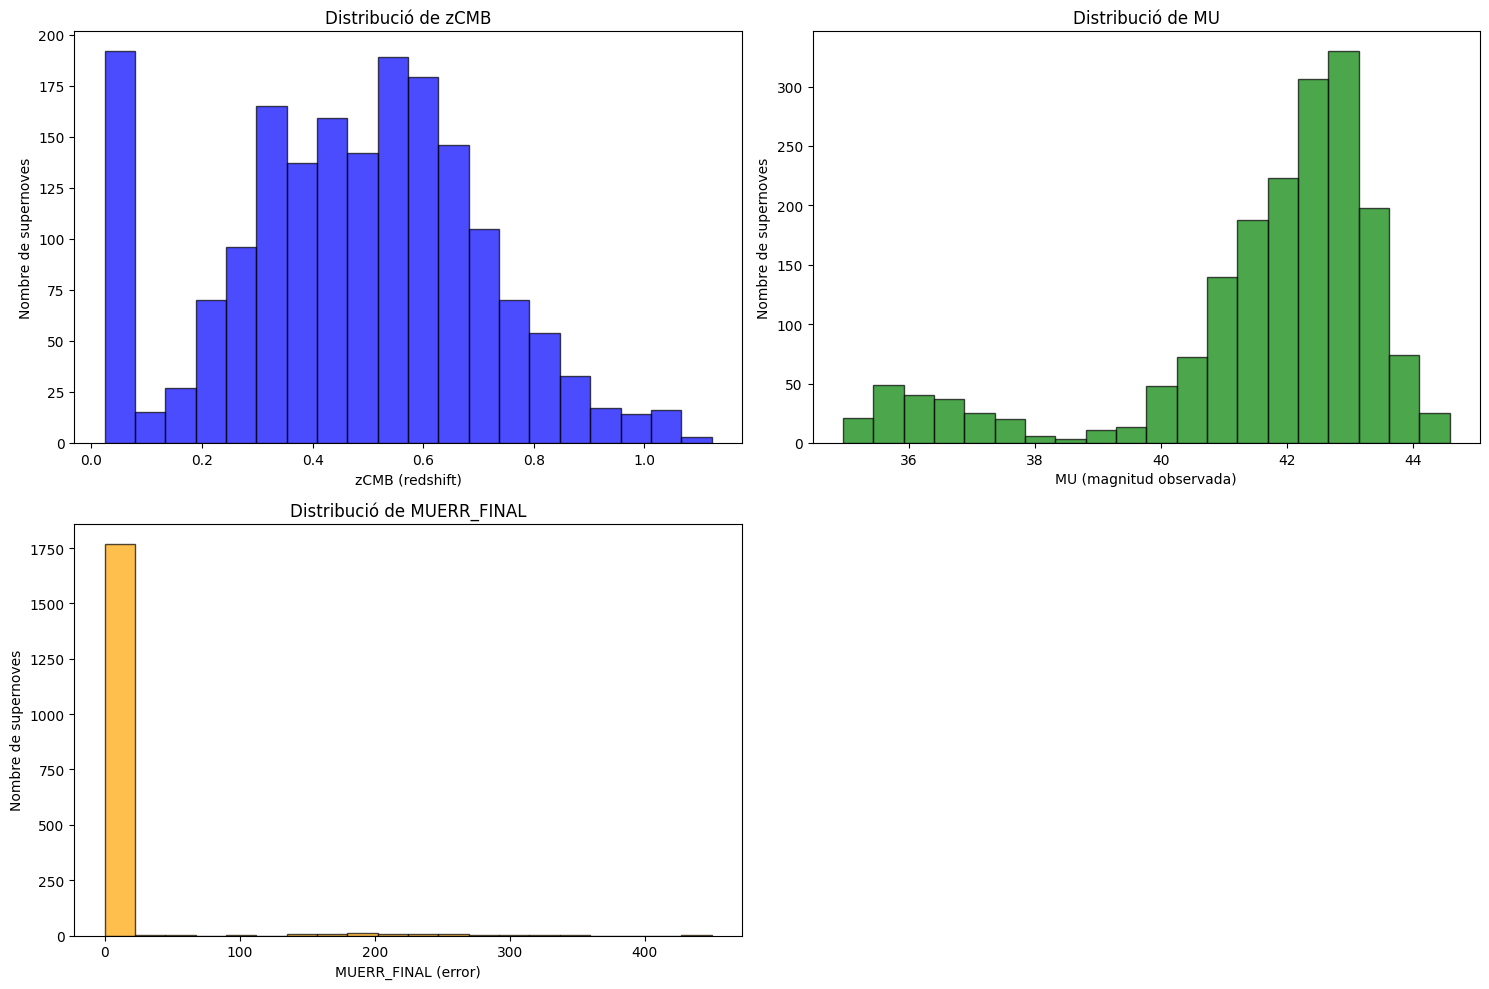


Dades amb MUERR_FINAL > 5:
          CID  IDSURVEY     zCMB      zHD     zHEL       MU  MUERR_FINAL
10    1246796        10  0.55502  0.55502  0.55626  43.4210     280.1536
35    1249416        10  0.33169  0.33169  0.33267  42.6221     192.5920
37    1249758        10  0.62139  0.62139  0.62198  42.9355     161.7507
81    1252225        10  0.51956  0.51956  0.52014  43.0787     170.5973
106   1253324        10  0.16945  0.16945  0.17026  40.8158     257.7207
...       ...       ...      ...      ...      ...      ...          ...
1537  1900801        10  0.63579  0.63579  0.63644  44.4744      96.6334
1566  1908493        10  0.67829  0.67829  0.67963  43.7230     285.3867
1574  1912270        10  0.86642  0.86642  0.86715  44.0635     449.6125
1603  1928108        10  0.65080  0.65080  0.65210  43.8689     258.0736
1624  1945100        10  0.66460  0.66460  0.66526  43.5012     208.8486

[64 rows x 7 columns]

Mostra de les primeres files:
       CID  IDSURVEY     zCMB      zHD    

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar el CSV
from google.colab import files
uploaded = files.upload()

# Carregar les dades al DataFrame
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# 1. Resum estadístic complet
print("Resum estadístic de les dades:")
print(df.describe(include='all'))

# 2. Comprovació de valors nuls
print("\nValors nuls per columna:")
print(df.isnull().sum())

# 3. Verificació de tipus de dades
print("\nTipus de dades de cada columna:")
print(df.dtypes)

# 4. Valors únics per a columnes rellevants
print("\nValors únics a 'IDSURVEY':", df['IDSURVEY'].unique())
print("Valors únics a 'zCMB':", df['zCMB'].unique()[:5], "...")
print("Valors únics a 'MU':", df['MU'].unique()[:5], "...")

# 5. Histogrames per identificar distribucions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df['zCMB'], bins=20, edgecolor='black', alpha=0.7, color='blue')
plt.xlabel('zCMB (redshift)')
plt.ylabel('Nombre de supernoves')
plt.title('Distribució de zCMB')

plt.subplot(2, 2, 2)
plt.hist(df['MU'], bins=20, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('MU (magnitud observada)')
plt.ylabel('Nombre de supernoves')
plt.title('Distribució de MU')

plt.subplot(2, 2, 3)
plt.hist(df['MUERR_FINAL'], bins=20, edgecolor='black', alpha=0.7, color='orange')
plt.xlabel('MUERR_FINAL (error)')
plt.ylabel('Nombre de supernoves')
plt.title('Distribució de MUERR_FINAL')

plt.tight_layout()
plt.show()

# 6. Detecció de valors atípics en MUERR_FINAL
print("\nDades amb MUERR_FINAL > 5:")
print(df[df['MUERR_FINAL'] > 5])

# 7. Exemple de files del DataFrame
print("\nMostra de les primeres files:")
print(df.head())

# 8. Comprovació de valors negatius en zCMB o MU
print("\nValors amb zCMB <= 0:")
print(df[df['zCMB'] <= 0])

print("\nValors amb MU <= 0:")
print(df[df['MU'] <= 0])

In [ ]:

# Importar llibreries necessàries
import pandas as pd
import numpy as np

# Carregar el fitxer CSV
from google.colab import files
uploaded = files.upload()

# Llegir les dades
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)

# Filtrar dades: eliminar errors grans i assegurar que MU i zCMB són raonables
data_filtrada = data[(data['MUERR_FINAL'] <= 1) & (data['zCMB'] > 0) & (data['MU'] > 0)].copy()

# Calcular distància lumínica en megaparsecs (Mpc)
data_filtrada.loc[:, 'distancia'] = 10 ** ((data_filtrada['MU'] - 25) / 5)

# Calcular velocitat recessional (v = z * c, amb c = 299792 km/s)
c = 299792  # Velocitat de la llum en km/s
data_filtrada.loc[:, 'velocitat'] = data_filtrada['zCMB'] * c

# Estimar H_0 per a cada supernova: H_0 = velocitat / distància
data_filtrada.loc[:, 'H0_estimacio'] = data_filtrada['velocitat'] / data_filtrada['distancia']

# Ponderar segons l'invers del quadrat de l'error
data_filtrada.loc[:, 'pes'] = 1 / (data_filtrada['MUERR_FINAL'] ** 2)

# Calcular \( H_0 \) mitjà i el seu error utilitzant la ponderació
H0_mitja = np.average(data_filtrada['H0_estimacio'], weights=data_filtrada['pes'])
H0_error = np.sqrt(1 / np.sum(data_filtrada['pes']))

# Resultats
print(f"Supernoves analitzades després del filtratge: {len(data_filtrada)}")
print(f"Valor mitjà de H0: {H0_mitja:.2f} km/s/Mpc")
print(f"Error de H0: {H0_error:.2f} km/s/Mpc")

Saving supernovas.csv to supernovas (3).csv
Supernoves analitzades després del filtratge: 1754
Valor mitjà de H0: 56.78 km/s/Mpc
Error de H0: 0.00 km/s/Mpc


Saving supernovas.csv to supernovas (14).csv
            CID     zCMB       MU         H0
0       1246275  0.24605  40.5938  56.115660
1       1246281  0.33549  41.2263  57.179491
2       1246314  0.38337  41.6383  54.047900
3       1246527  0.32078  41.1991  55.361518
4       1246529  0.49677  42.1471  55.405906
...         ...      ...      ...        ...
1824  SN2017cpu  0.05529  36.8308  71.335760
1825   SN2017hn  0.02492  35.2067  67.924858
1826   SN2017mf  0.02618  35.3916  65.534554
1827   SN2017ms  0.02538  35.3421  64.996852
1828   iPTF17dz  0.09284  38.3430  59.697457

[1829 rows x 4 columns]

Valor mitjà de H0: 54.07 km/s/Mpc
Desviació estàndard de H0: 7.74 km/s/Mpc


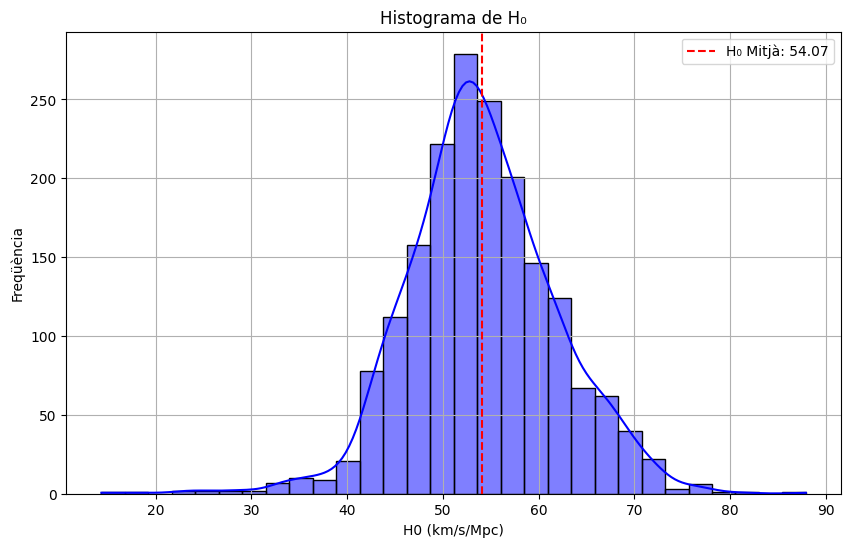

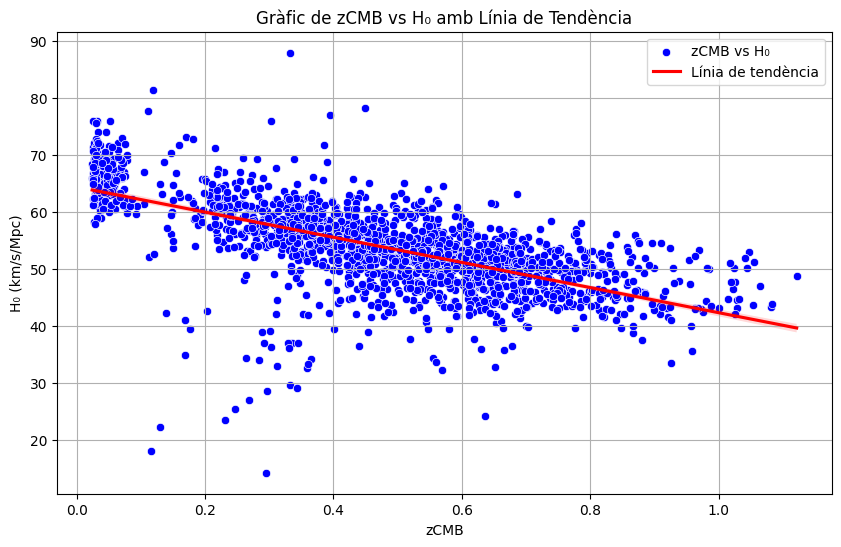

In [ ]:

# Importar les llibreries necessàries per a l'anàlisi de dades i la visualització gràfica
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir el fitxer CSV des de l'ordinador local al Colab
uploaded = files.upload()

# Obtenir el nom del fitxer carregat i llegir-lo com un DataFrame
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Definir la constant de la velocitat de la llum en km/s
c = 299792.458

# Calcular la lluminositat a distància (d_L) en Mpc
# d_L es calcula a partir de la modulació de distància (MU) utilitzant la fórmula: d_L = 10 ** ((MU / 5) - 5)
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)

# Calcular el valor de la constant de Hubble (H₀) per a cada fila
# H₀ = (c * zCMB) / d_L
df['H0'] = (c * df['zCMB']) / df['d_L']

# Calcular el valor mitjà i la desviació estàndard de H₀
H0_promedio = df['H0'].mean()  # Valor mitjà de H₀
H0_std = df['H0'].std()        # Desviació estàndard de H₀

# Mostrar les primeres files del DataFrame amb les columnes seleccionades i els valors estadístics de H₀
print(df[['CID', 'zCMB', 'MU', 'H0']])
print(f"\nValor mitjà de H0: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviació estàndard de H0: {H0_std:.2f} km/s/Mpc")

# Crear un histograma per visualitzar la distribució de H₀
plt.figure(figsize=(10, 6))
sns.histplot(df['H0'], bins=30, kde=True, color='blue')  # Histograma amb densitat de kernel
plt.axvline(H0_promedio, color='r', linestyle='--', label=f'H₀ Mitjà: {H0_promedio:.2f}')  # Línia vertical al valor mitjà
plt.xlabel('H0 (km/s/Mpc)')
plt.ylabel('Freqüència')
plt.title('Histograma de H₀')
plt.legend()
plt.grid(True)
plt.show()

# Crear un gràfic de dispersió de zCMB vs H₀ i afegir-hi una línia de tendència
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zCMB', y='H0', data=df, color='blue', label='zCMB vs H₀')  # Punts de dispersió
sns.regplot(x='zCMB', y='H0', data=df, scatter=False, color='red', label='Línia de tendència')  # Línia de regressió
plt.xlabel('zCMB')
plt.ylabel('H₀ (km/s/Mpc)')
plt.title('Gràfic de zCMB vs H₀ amb Línia de Tendència')
plt.legend()
plt.grid(True)
plt.show()

Saving supernovas.csv to supernovas (15).csv
       CID     zCMB       MU         H0
0  1246275  0.24605  40.5938  56.115660
1  1246281  0.33549  41.2263  57.179491
2  1246314  0.38337  41.6383  54.047900
3  1246527  0.32078  41.1991  55.361518
4  1246529  0.49677  42.1471  55.405906

Valor mitjà de H₀: 54.07 km/s/Mpc
Desviació estàndard de H₀: 7.74 km/s/Mpc


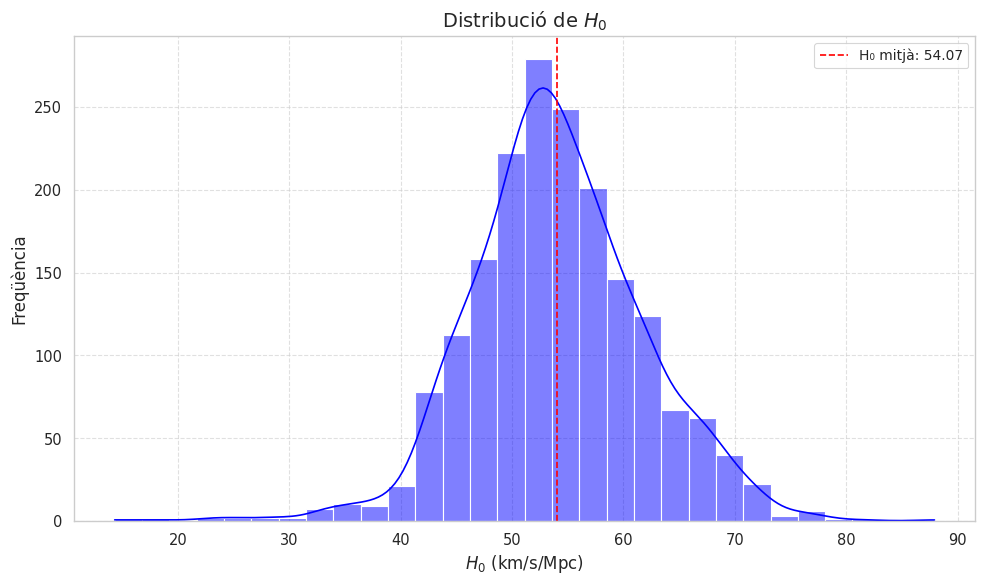

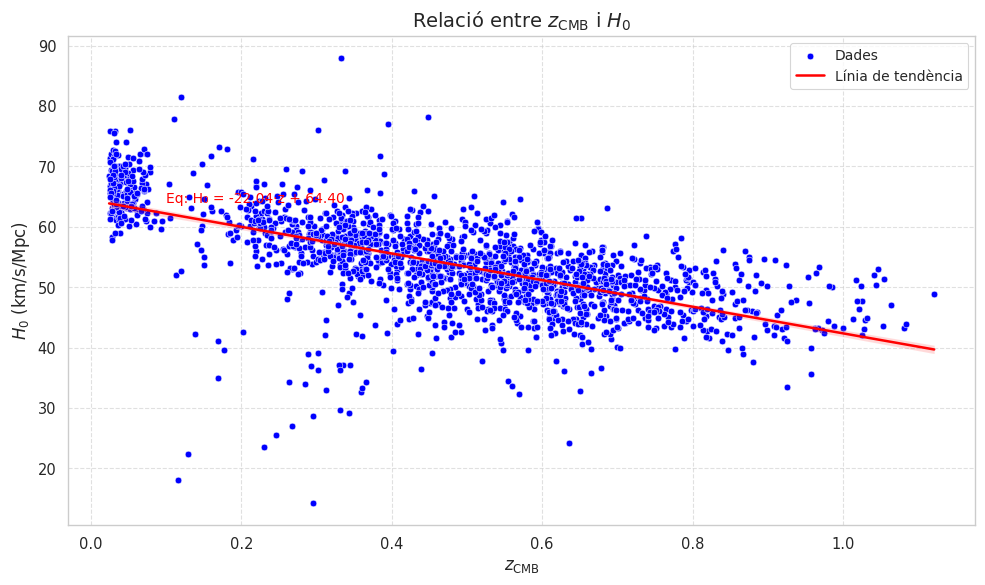

In [ ]:

# Importar les llibreries necessàries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from scipy.stats import linregress

# Configuració inicial per a gràfics
sns.set_style("whitegrid")  # Estil net
sns.set_context("paper", font_scale=1.2)  # Escala de fonts per publicació

# Carregar el fitxer CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Definir constants
c = 299792.458  # Velocitat de la llum en km/s

# Calcular lluminositat a distància (d_L) en Mpc i constant de Hubble (H₀)
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)  # d_L en Mpc
df['H0'] = (c * df['zCMB']) / df['d_L']  # H₀ en km/s/Mpc

# Càlculs estadístics per H₀
H0_promedio = df['H0'].mean()  # Valor mitjà de H₀
H0_std = df['H0'].std()        # Desviació estàndard de H₀

# Mostrar dades i estadístiques
print(df[['CID', 'zCMB', 'MU', 'H0']].head())
print(f"\nValor mitjà de H₀: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviació estàndard de H₀: {H0_std:.2f} km/s/Mpc")

# Histograma de H₀
plt.figure(figsize=(10, 6))
sns.histplot(df['H0'], bins=30, kde=True, color='blue')
plt.axvline(H0_promedio, color='r', linestyle='--', label=f'H₀ mitjà: {H0_promedio:.2f}')
plt.xlabel(r'$H_0$ (km/s/Mpc)', fontsize=12)
plt.ylabel('Freqüència', fontsize=12)
plt.title('Distribució de $H_0$', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("histograma_H0.png", dpi=300)
plt.show()

# Gràfic de dispersió zCMB vs H₀ amb línia de tendència
# Calcular regressió lineal
slope, intercept, r_value, p_value, std_err = linregress(df['zCMB'], df['H0'])

# Crear el gràfic
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zCMB', y='H0', data=df, color='blue', label='Dades')
sns.regplot(x='zCMB', y='H0', data=df, scatter=False, color='red', label='Línia de tendència')
plt.xlabel(r'$z_{\text{CMB}}$', fontsize=12)
plt.ylabel(r'$H_0$ (km/s/Mpc)', fontsize=12)
plt.title(r'Relació entre $z_{\text{CMB}}$ i $H_0$', fontsize=14)
plt.text(0.1, H0_promedio + 10, f'Eq: H₀ = {slope:.2f}·z + {intercept:.2f}', fontsize=10, color='red')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("grafica_zCMB_vs_H0.png", dpi=300)
plt.show()

Saving supernovas.csv to supernovas (10).csv
            CID     zCMB       MU         H0
0       1246275  0.24605  40.5938  56.115660
1       1246281  0.33549  41.2263  57.179491
2       1246314  0.38337  41.6383  54.047900
3       1246527  0.32078  41.1991  55.361518
4       1246529  0.49677  42.1471  55.405906
...         ...      ...      ...        ...
1824  SN2017cpu  0.05529  36.8308  71.335760
1825   SN2017hn  0.02492  35.2067  67.924858
1826   SN2017mf  0.02618  35.3916  65.534554
1827   SN2017ms  0.02538  35.3421  64.996852
1828   iPTF17dz  0.09284  38.3430  59.697457

[1829 rows x 4 columns]

Valor promedio de H0: 54.07 km/s/Mpc
Desviación estándar de H0: 7.74 km/s/Mpc


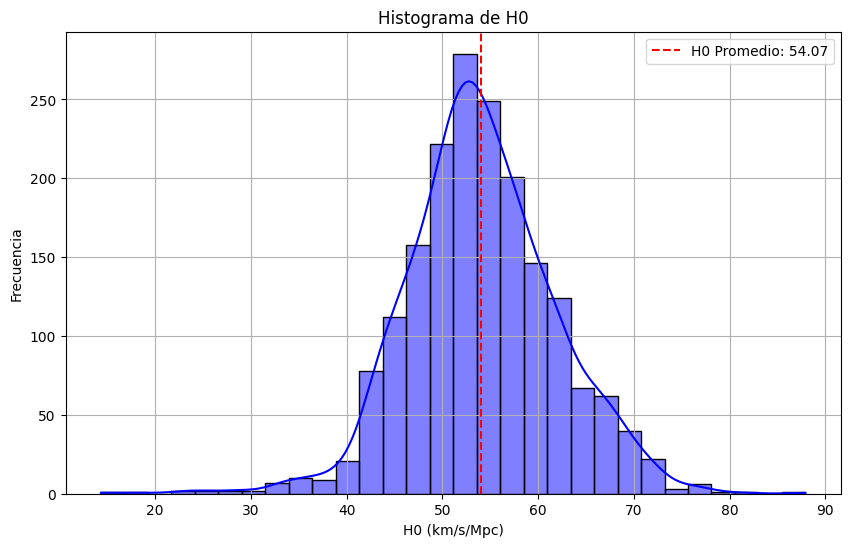

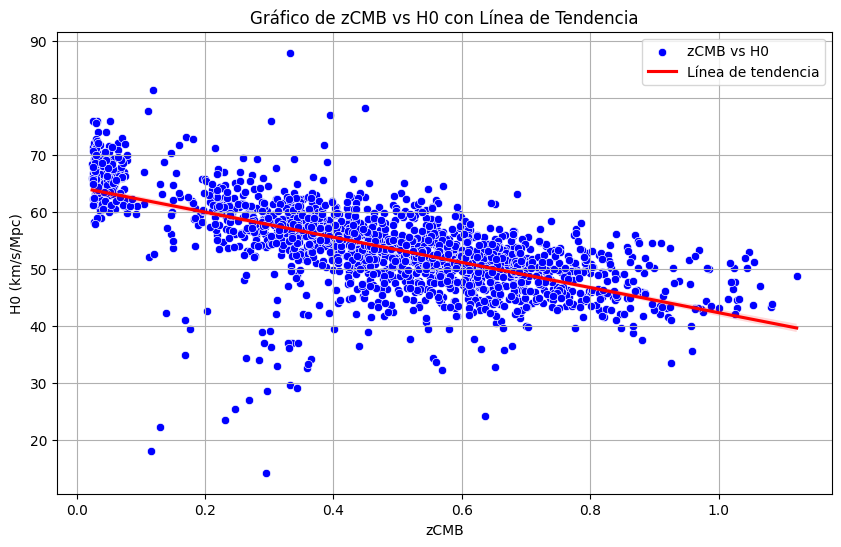

In [ ]:
#Citation DES Collaboration: T. M. C. Abbott et al 2024 ApJL 973 L14DOI 10.3847/2041-8213/ad6f9f# Importar librerías necesarias
#https://github.com/des-science/DES-SN5YR

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir archivo CSV
uploaded = files.upload()

# Leer el archivo CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Constante: velocidad de la luz en km/s
c = 299792.458

# Calcular d_L en Mpc y H_0 para cada fila
df['d_L'] = 10 ** ((df['MU'] / 5) - 5)
df['H0'] = (c * df['zCMB']) / df['d_L']

# Calcular el valor promedio y la desviación estándar de H0
H0_promedio = df['H0'].mean()
H0_std = df['H0'].std()

# Mostrar las primeras filas del DataFrame, el valor promedio y la desviación estándar de H0
print(df[['CID', 'zCMB', 'MU', 'H0']])
print(f"\nValor promedio de H0: {H0_promedio:.2f} km/s/Mpc")
print(f"Desviación estándar de H0: {H0_std:.2f} km/s/Mpc")

# Crear un histograma de H0
plt.figure(figsize=(10, 6))
sns.histplot(df['H0'], bins=30, kde=True, color='blue')
plt.axvline(H0_promedio, color='r', linestyle='--', label=f'H0 Promedio: {H0_promedio:.2f}')
plt.xlabel('H0 (km/s/Mpc)')
plt.ylabel('Frecuencia')
plt.title('Histograma de H0')
plt.legend()
plt.grid(True)
plt.show()

# Crear un gráfico de zCMB vs H0 con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='zCMB', y='H0', data=df, color='blue', label='zCMB vs H0')
sns.regplot(x='zCMB', y='H0', data=df, scatter=False, color='red', label='Línea de tendencia')
plt.xlabel('zCMB')
plt.ylabel('H0 (km/s/Mpc)')
plt.title('Gráfico de zCMB vs H0 con Línea de Tendencia')
plt.legend()
plt.grid(True)
plt.show()

Constant de Hubble (H0): 67.71 ± 0.40 km/s/Mpc


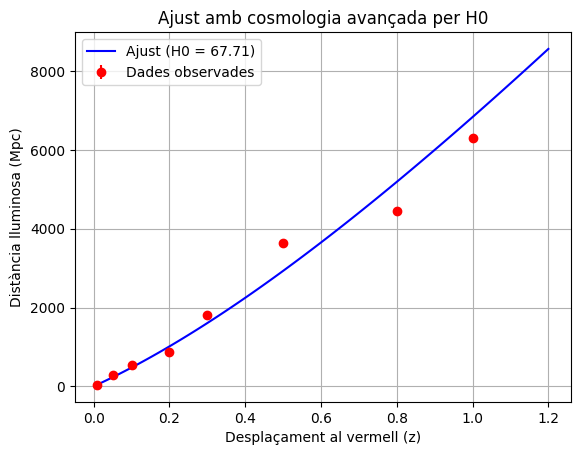

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import quad

# Constants cosmològiques
c = 3e5  # Velocitat de la llum en km/s
Omega_m = 0.3  # Densitat de matèria
Omega_lambda = 0.7  # Densitat d'energia fosca

# Funció per calcular el factor d'Hubble (1/E(z))
def E_inverse(z, Omega_m, Omega_lambda):
    """
    Factor invers de Hubble:
    E(z) = sqrt(Omega_m * (1 + z)^3 + Omega_lambda)
    """
    return 1 / np.sqrt(Omega_m * (1 + z)**3 + Omega_lambda)

# Distància lluminosa en Mpc
def distancia_lluminosa_cosmol(redshift, H0):
    """
    Distància lluminosa utilitzant la cosmologia plana:
    d_L = (c / H0) * (1 + z) * integral[0, z](dz' / E(z'))
    """
    integral, _ = quad(E_inverse, 0, redshift, args=(Omega_m, Omega_lambda))
    return (c / H0) * (1 + redshift) * integral

# Vectoritzat per treballar amb arrays
vector_distancia_lluminosa = np.vectorize(distancia_lluminosa_cosmol)

# Funció per ajustar Hubble
def ajustar_hubble(redshifts, distancies, errors=None):
    """
    Ajusta les dades per determinar H0.
    """
    popt, pcov = curve_fit(lambda z, H0: vector_distancia_lluminosa(z, H0),
                           redshifts, distancies, sigma=errors, absolute_sigma=True)
    H0_opt = popt[0]  # Valor òptim de H0
    H0_error = np.sqrt(np.diag(pcov))[0]  # Incertesa de H0
    return H0_opt, H0_error

# Dades realistes (modificades)
redshifts = np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0])
distancies = np.array([40.5, 275, 540, 860, 1800, 3650, 4440, 6300])# distancies = np.array([43.5, 215, 430, 860, 1300, 2150, 3440, 4300])
errors = np.array([5, 10, 15, 20, 25, 40, 60, 80])

# Ajustem les dades i calculem H0
H0, H0_error = ajustar_hubble(redshifts, distancies, errors)

# Mostrem els resultats
print(f"Constant de Hubble (H0): {H0:.2f} ± {H0_error:.2f} km/s/Mpc")

# Generem gràfics per visualitzar l'ajust
redshift_fit = np.linspace(0.01, 1.2, 100)  # Valors continus per al gràfic
distancia_fit = vector_distancia_lluminosa(redshift_fit, H0)

plt.errorbar(redshifts, distancies, yerr=errors, fmt='o', label='Dades observades', color='red')
plt.plot(redshift_fit, distancia_fit, label=f"Ajust (H0 = {H0:.2f})", color='blue')
plt.xlabel("Desplaçament al vermell (z)")
plt.ylabel("Distància lluminosa (Mpc)")
plt.title("Ajust amb cosmologia avançada per H0")
plt.legend()
plt.grid()
plt.show()

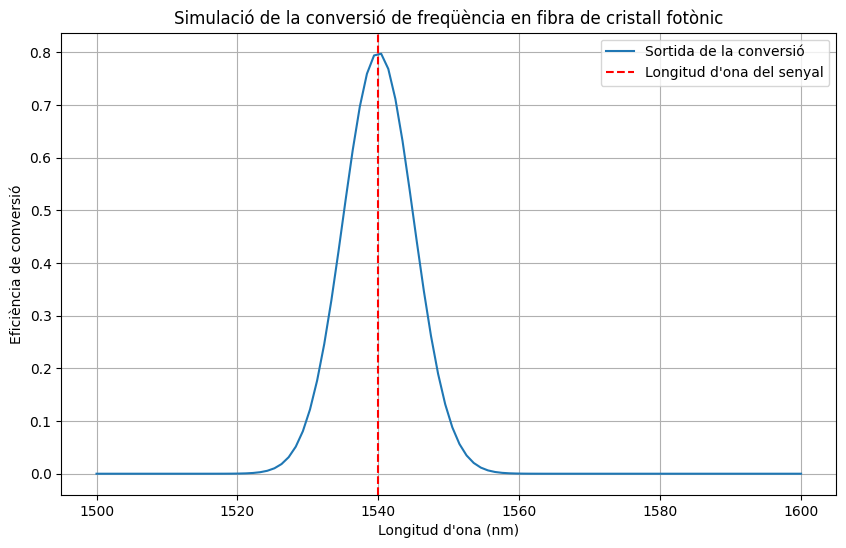

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Paràmetres de la simulació lo
longitud_ona_bomba = 1550  # en nm
longitud_ona_senyal = 1540  # en nm
eficiencia_conversio = 0.8  # 80% d'eficiència

# Càlcul de la conversió de freqüència
frequencia_bomba = 3e8 / (longitud_ona_bomba * 1e-9)  # Convertim nm a m i calculem la freqüència
frequencia_senyal = 3e8 / (longitud_ona_senyal * 1e-9)
frequencia_convertida = frequencia_bomba - frequencia_senyal

# Simulació del procés de conversió
num_punts = 100
longituds_ona = np.linspace(1500, 1600, num_punts)
sortida_conversio = eficiencia_conversio * np.exp(-((longituds_ona - longitud_ona_senyal)**2) / (2 * 5**2))

# Creació del gràfic
plt.figure(figsize=(10, 6))
plt.plot(longituds_ona, sortida_conversio, label='Sortida de la conversió')
plt.axvline(longitud_ona_senyal, color='r', linestyle='--', label='Longitud d\'ona del senyal')
plt.xlabel('Longitud d\'ona (nm)')
plt.ylabel('Eficiència de conversió')
plt.title('Simulació de la conversió de freqüència en fibra de cristall fotònic')
plt.legend()
plt.grid(True)
plt.show()